In [1]:
from matplotlib import animation
import numpy as np
from matplotlib import pyplot as plt

In [4]:
import tensorflow as tf

In [135]:
%run data_gen_script.py

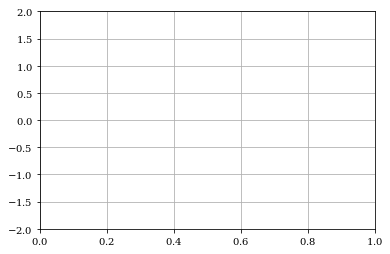

In [7]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0,1,10)
    y = np.zeros(10)
    y[1:10] = data[i, 0:9] 
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

writer = animation.PillowWriter
writer.setup(writer,fig, 'movie')

In [128]:
data = np.loadtxt('./simulations/sine_simul1.txt')

In [130]:
data.shape

(360001, 10)

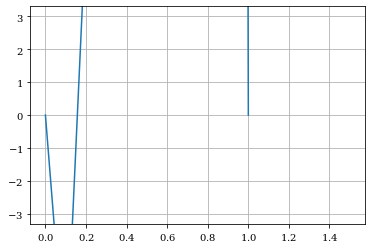

2049


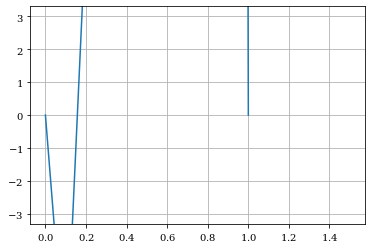

In [133]:
from IPython.display import display, clear_output

fig, ax = plt.subplots()
l, = ax.plot([0,1.5],[-3,3])

x = np.linspace(0,1,11)
y = np.zeros((360001,11))
y[:, 1:-1] = data[:, 0:9] 

animate = lambda i: l.set_data(x, y[i, :]*1e3)

for i in range(2000,2050):
    animate(i)
    clear_output(wait=True)
    display(fig)
    print(i)
    
plt.show()

In [37]:
x.shape

(11,)

In [8]:
%run experiment_LSTM.py

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________
Train for 300 steps, validate for 50 steps
Epoch 1/30
297/300 [============================>.] - ETA: 0s - loss: 0.9367 - coeff_determination: 0.0593 - mean_squared_error: 0.9367 - root_mean_squared_error: 0.9678 - mean_absolute_error: 0.7641
Epoch 00001: val_loss improved from inf to 0.84252, saving model to checkpoint.keras
300/300 [==============================] - 6s 21ms/step - loss: 0.9349 - coeff_determination: 0.0609 - mean_squared_error: 0.9349 - root_mean_squared_error: 0.9669 - mean_absolute_error: 0.763

Epoch 13/30
298/300 [============================>.] - ETA: 0s - loss: 0.1422 - coeff_determination: 0.8563 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3772 - mean_absolute_error: 0.2936
Epoch 00013: val_loss improved from 0.15025 to 0.14667, saving model to checkpoint.keras
300/300 [==============================] - 3s 11ms/step - loss: 0.1421 - coeff_determination: 0.8564 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3770 - mean_absolute_error: 0.2935 - val_loss: 0.1467 - val_coeff_determination: 0.8348 - val_mean_squared_error: 0.1467 - val_root_mean_squared_error: 0.3830 - val_mean_absolute_error: 0.2976
Epoch 14/30
296/300 [============================>.] - ETA: 0s - loss: 0.1384 - coeff_determination: 0.8598 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3720 - mean_absolute_error: 0.2900
Epoch 00014: val_loss improved from 0.14667 to 0.14379, saving model to checkpoint.keras
300/300 [==============================] - 3s 11ms/step - loss: 0.13

Epoch 26/30
296/300 [============================>.] - ETA: 0s - loss: 0.1168 - coeff_determination: 0.8822 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3417 - mean_absolute_error: 0.2667
Epoch 00026: val_loss improved from 0.12026 to 0.11829, saving model to checkpoint.keras
300/300 [==============================] - 3s 11ms/step - loss: 0.1167 - coeff_determination: 0.8824 - mean_squared_error: 0.1167 - root_mean_squared_error: 0.3416 - mean_absolute_error: 0.2667 - val_loss: 0.1183 - val_coeff_determination: 0.8636 - val_mean_squared_error: 0.1183 - val_root_mean_squared_error: 0.3439 - val_mean_absolute_error: 0.2691
Epoch 27/30
296/300 [============================>.] - ETA: 0s - loss: 0.1143 - coeff_determination: 0.8837 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3381 - mean_absolute_error: 0.2641
Epoch 00027: val_loss improved from 0.11829 to 0.11720, saving model to checkpoint.keras
300/300 [==============================] - 4s 12ms/step - loss: 0.11

In [9]:
data = np.loadtxt('./simulations/random_simul3.txt')
mean = data.mean(axis=0)
data -= mean
std = data.std(axis=0)
data /= std

In [138]:
from KERAS_utils import prepare_data

In [144]:
data.shape

(360001, 10)

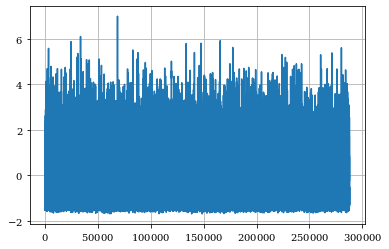

In [20]:
plt.plot(y_train_uni)

In [10]:
x_train_uni_rnd, y_train_uni_rnd = prepare_data(data, loc_sg,
                                           0, None,
                                           univariate_past_history,
                                           univariate_future_target)

y_pred_rnd = model.predict(x_train_uni_rnd)


In [196]:
y_pred_rnd.shape

(35951, 1)

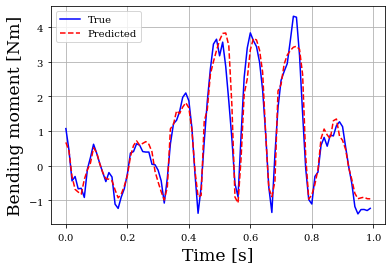

In [13]:
f = plt.figure()

n=100
# Plot and compare the two signals.
plt.plot(np.arange(n)*.01,y_train_uni_rnd[100:int(100+n)], 'b', label='True')
plt.plot(np.arange(n)*.01,y_pred_rnd[100:int(100+n)], 'r--', label= 'Predicted')

# Plot labels etc.
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Bending moment [Nm]')
plt.show()
f.savefig("random_simultwosensorzoom.png", bbox_inches='tight', dpi=600)

In [238]:
xline = np.zeros(10)
for i in np.arange(xline.shape[0]):
    xline[i] = x_train_uni_rnd[i][-1]

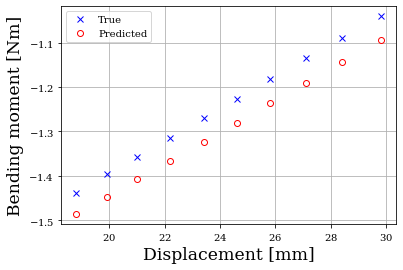

In [239]:
f = plt.figure()
i=4 #sensor at midspan
xline = xline*std[i]+mean[i]
span = np.arange(80,91)
# Plot and compare the two signals.
plt.plot(xline*1000,y_train_uni_rnd[0:10], 'bx', label='True')
plt.plot(xline*1000, y_pred_rnd[0:10], 'ro', label= 'Predicted', fillstyle='none')

# Plot labels etc.
plt.legend()
plt.xlabel('Displacement [mm]')
plt.ylabel('Bending moment [Nm]')
plt.show()
f.savefig("random_IO2sensors.png", bbox_inches='tight', dpi=600)

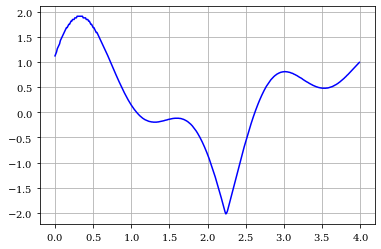

In [252]:
plt.plot(np.arange(400)*.01, data[100:500,-1], 'b')

In [255]:
np.arange(2, (n_elem - 2)*2, 4)

array([ 2,  6, 10, 14, 18, 22, 26, 30, 34])

In [240]:
xline

array([0.0188, 0.0199, 0.021 , 0.0222, 0.0234, 0.0246, 0.0258, 0.0271,
       0.0284, 0.0298])

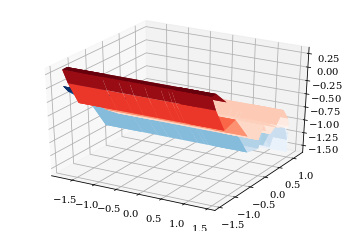

In [126]:
from mpl_toolkits import mplot3d
from matplotlib import cm

fig = plt.figure()
ax = plt.axes(projection='3d')
# Make data.
i=1
j=7
X =  data[:,i]*std[i]+mean[i]
Y = data[:,j]*std[i]+mean[i]
X, Y = np.meshgrid(X[80:100]*1000, Y[80:100]*1000)
Z = y_pred_rnd[80:100]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Reds,
                       linewidth=0, antialiased=True)

Z2 = y_train_uni_rnd.reshape((71951,1))
surf = ax.plot_surface(X, Y, Z2[80:100], cmap=cm.Blues,
                       linewidth=0, antialiased=True)

In [123]:
Z

<tf.Tensor: shape=(20, 1), dtype=float32, numpy=
array([[ 0.07253022],
       [ 0.32278228],
       [ 0.31913236],
       [ 0.0332395 ],
       [-0.41684902],
       [-0.3398754 ],
       [-0.79228747],
       [-0.99322987],
       [-0.77066255],
       [-0.90334857],
       [-1.0188783 ],
       [-0.92340124],
       [-0.7103158 ],
       [-0.9306567 ],
       [-1.0902959 ],
       [-1.0554554 ],
       [-1.1304626 ],
       [-1.0733776 ],
       [-0.97853017],
       [-0.70902467]], dtype=float32)>

(360001, 10)

In [6]:
new_model = tf.keras.models.load_model('checkpoint.keras')

ValueError: No model found in config file.

In [30]:
y_pred = model.predict(x_val_uni)

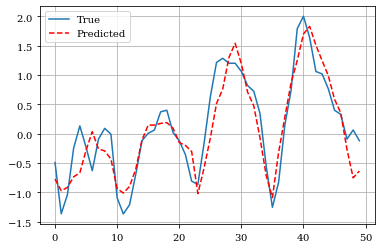

In [31]:
# Plot and compare the two signals.
plt.plot(y_val_uni[100:150], label='True')
plt.plot(y_pred[100:150], 'r--',label='Predicted')
        
# Plot labels etc.
plt.legend()
plt.show()